> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [Dataset-name]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected/downloaded for analysis. Read through the description available on the `Project Details` page of `Investigate a Dataset` lesson for this course. List all column names in each table, and their significance. In case of multiple tables, describe the relationship between tables. 


### Question(s) for Analysis
>**Tip**: Clearly state one or more questions that you plan on exploring over the course of the report. You will address these questions in the **data analysis** and **conclusion** sections. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> **Tip**: Once you start coding, use NumPy arrays, Pandas Series, and DataFrames where appropriate rather than Python lists and dictionaries. Also, **use good coding practices**, such as, define and use functions to avoid repetitive code. Use appropriate comments within the code cells, explanation in the mark-down cells, and meaningful variable names. 

# Introduction

Dataset Description : 
The dataset is a medical dataset containing information on 110,527 medical appointments in Brazil. It includes 14 variables associated with each appointment, such as patient demographics, health conditions, and appointment details.

The main purpose of the dataset is to explore the factors that affect whether a patient attends their medical appointment or not. This analysis can help healthcare providers identify patterns and improve appointment attendance rates.

The dataset was originally published on Kaggle and is available at:
https://www.kaggle.com/datasets/joniarroba/noshowappointments

# Column Names and Their Significance

PatientId: A unique identifier for each patient.

AppointmentID: A unique identifier for each appointment.

Gender: Indicates the gender of the patient – either Male or Female.

ScheduledDay: The date and time when the appointment was scheduled.

AppointmentDay: The actual date when the appointment was supposed to take place.

Age: The age of the patient in years.

Neighbourhood: The neighborhood in which the patient lives.

Scholarship: Indicates whether the patient is enrolled in the Brazilian welfare program (1 means Yes, 0 means No).

Hipertension: Indicates whether the patient has high blood pressure (1 = Yes, 0 = No).

Diabetes: Indicates whether the patient has diabetes (1 = Yes, 0 = No).

Alcoholism: Indicates whether the patient has a history of alcoholism (1 = Yes, 0 = No).

Handcap: Indicates whether the patient is handicapped. The values range from 0 (no disability) to 4 (higher disability level).

SMS_received: Indicates whether the patient received an SMS reminder for the appointment (1 = Yes, 0 = No).

No-show: Indicates whether the patient missed the appointment. “No” means the patient showed up, and “Yes” means the patient did not attend.

# Question(s) for Analysis
1-Does a patient’s age affect whether they show up for their medical appointment or not?

2-Does receiving an SMS reminder affect whether a patient shows up for their medical appointment?

3-Does receiving a scholarship affect whether a patient shows up for their appointment?

# Import essential libraries

In [39]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# While optional for current notebooks, if you are having trouble with visualizations,
#   remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations initially. This does not have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, trim the excess and organize your steps so that you have a flowing, cohesive report.

# Load your data and cheak on the data

In [40]:
# Load your data and print out a few lines. What is the size of your dataframe? 
#   Perform operations to inspect data types and look for instances of missing
#   or possibly errant data. There are at least 4 - 6 methods you can call on your
#   dataframe to obtain this information.
df=pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [41]:
df.shape

(110527, 14)

In [42]:
#Cheak on the data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [43]:
#Cheak on the data type
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [44]:
#Cheak on the missing data
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [45]:
#Cheak on the unique data
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [46]:
#Cheak if there is duplicate data
df[df.duplicated()]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


In [47]:
#Cheak if there is errant data of the age the age shows -1
df.loc[(df["Age"]<0)|(df["Age"]>120)]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [48]:
#Cheak if there is errant data there is Handcap shows num over 0
cols = ['Handcap', 'Scholarship', 'Hipertension', 'Diabetes', 'SMS_received']
df[df[cols].apply(lambda x: (x < 0) | (x > 1)).any(axis=1)]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
946,7.282582e+13,5582483,M,2016-04-14T09:26:08Z,2016-04-29T00:00:00Z,94,BELA VISTA,0,1,1,0,2,1,No
1665,1.242919e+13,5525497,M,2016-03-30T09:16:41Z,2016-04-29T00:00:00Z,64,SANTA MARTHA,0,1,0,1,2,1,No
1666,1.242919e+13,5525498,M,2016-03-30T09:16:41Z,2016-04-29T00:00:00Z,64,SANTA MARTHA,0,1,0,1,2,0,No
2071,1.242919e+13,5640120,M,2016-04-29T10:08:48Z,2016-04-29T00:00:00Z,64,SANTA MARTHA,0,1,0,1,2,0,No
2091,1.491829e+13,5638626,F,2016-04-29T08:13:59Z,2016-04-29T00:00:00Z,11,ANDORINHAS,0,0,0,0,2,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108376,2.387212e+14,5756931,F,2016-06-01T08:48:28Z,2016-06-07T00:00:00Z,44,ROMÃO,0,1,1,0,2,1,No
109484,3.589495e+14,5752442,M,2016-05-31T11:45:57Z,2016-06-02T00:00:00Z,64,DA PENHA,0,1,1,0,2,0,No
109733,5.662976e+14,5772744,F,2016-06-03T16:11:00Z,2016-06-07T00:00:00Z,34,JUCUTUQUARA,0,0,0,0,2,1,No
109975,4.522185e+13,5766970,M,2016-06-02T16:07:36Z,2016-06-06T00:00:00Z,39,PRAIA DO SUÁ,1,0,0,0,2,1,No


In [49]:
(df["Handcap"] > 1).sum()

199


### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

In [50]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
# change No-show cloums to 0,1
df['No-show'] = df['No-show'].replace("Yes", 1)
df['No-show'] = df['No-show'].replace("No", 0)

In [51]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show             int64
dtype: object

In [52]:
# change data type of colums ScheduledDay ,AppointmentDay intger to datetime64
df['ScheduledDay']=pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay']=pd.to_datetime(df['AppointmentDay'])

In [53]:
df.dtypes

PatientId                     float64
AppointmentID                   int64
Gender                         object
ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
Age                             int64
Neighbourhood                  object
Scholarship                     int64
Hipertension                    int64
Diabetes                        int64
Alcoholism                      int64
Handcap                         int64
SMS_received                    int64
No-show                         int64
dtype: object

In [54]:
# find the info about the index 99832 to dorp the row the Patient who is age -1
df.iloc[99832]

PatientId                 465943158731293.0
AppointmentID                       5775010
Gender                                    F
ScheduledDay      2016-06-06 08:58:13+00:00
AppointmentDay    2016-06-06 00:00:00+00:00
Age                                      -1
Neighbourhood                         ROMÃO
Scholarship                               0
Hipertension                              0
Diabetes                                  0
Alcoholism                                0
Handcap                                   0
SMS_received                              0
No-show                                   0
Name: 99832, dtype: object

In [55]:
#cheak about PatientId is 465943158731293.0 
df.loc[df["PatientId"]==465943158731293.0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06 08:58:13+00:00,2016-06-06 00:00:00+00:00,-1,ROMÃO,0,0,0,0,0,0,0


In [56]:
#drop the row ,index 99832 bc the age -1
df.drop(99832,inplace=True)

In [57]:
# cheak if the row delet or not 
df.loc[df["PatientId"]==465943158731293.0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


In [58]:
df['Handcap'] = df['Handcap'].replace([2,4,3], 1)

In [59]:
df.loc[df["Handcap"]==2|3|4]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


In [60]:
(df["Handcap"] > 1).sum()

0

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. Remember to utilize the visualizations that the pandas library already has available.



> **Tip**: Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### 1-Does a patient’s age affect whether they show up for their medical appointment or not?

In [61]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
df.describe()


,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.020276,0.321029,0.201934
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.140943,0.466874,0.401445
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# the smallset age is 0 and the avarge age is 37
# 32% of patient  received SMS
# 20% they did not show 

Text(0.5, 1.0, 'Distribution of Age')

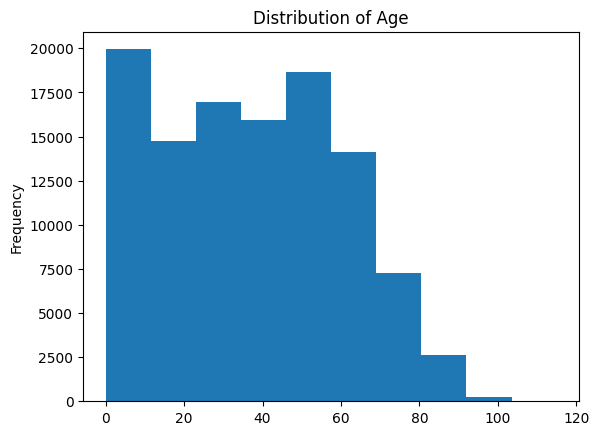

In [62]:
# freqency of age
df["Age"].plot(kind="hist")
plt.title('Distribution of Age')

<AxesSubplot: >

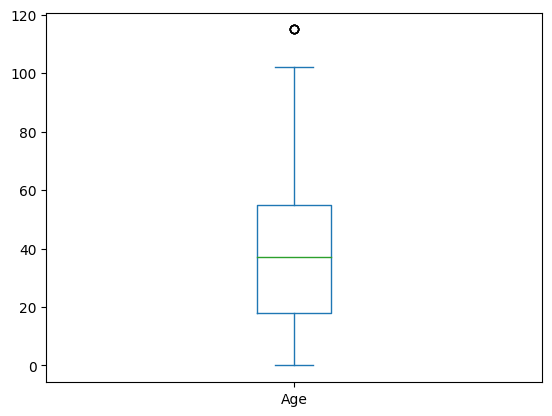

In [63]:
#there is one outliner whish is 115 it's seems normal
df["Age"].plot(kind="box")

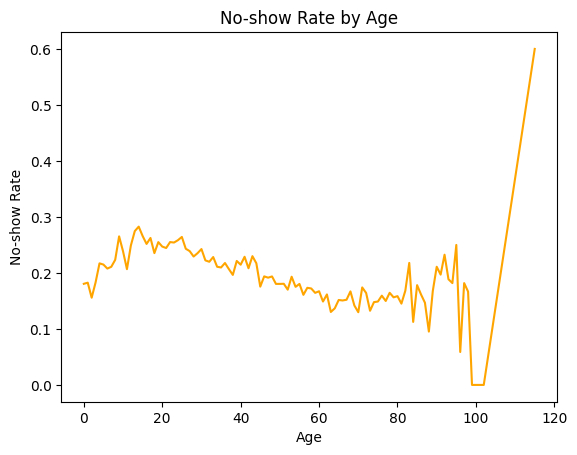

In [64]:
# The no-show rate increases when the patient’s age is over 100
grouped = df.groupby('Age')['No-show'].mean()
grouped.plot(kind='line', color='orange')
plt.title('No-show Rate by Age')
plt.xlabel('Age')
plt.ylabel('No-show Rate')
plt.show()

### 2-Does receiving an SMS reminder affect whether a patient shows up for their medical appointment?

In [65]:
# Plot the no-show rate grouped by whether they received an SMS reminder or not 
# 28% Received SMS they did not show!
sms_group = df.groupby('SMS_received')['No-show'].mean()
sms_group.plot(kind='bar', color=['green','red'])
plt.title('No-show Rate by SMS Received')
plt.xlabel('SMS Received (0=No, 1=Yes)')b
plt.ylabel('No-show Rate')
plt.ylim(0,1)
plt.xticks([0,1], ['No', 'Yes'], rotation=0)
plt.show()



SyntaxError: invalid syntax (896936741.py, line 6)

# Does receiving a scholarship affect whether a patient shows up for their appointment?

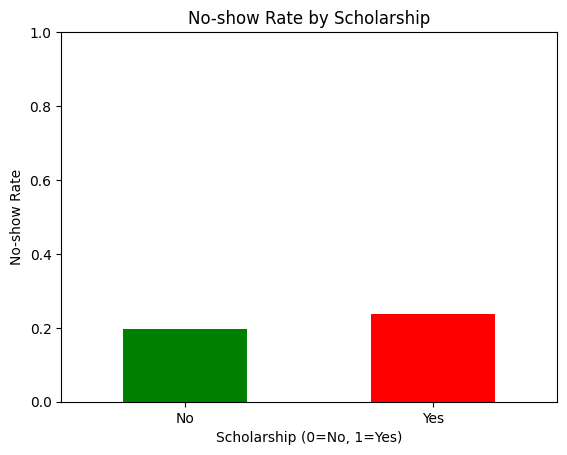

In [66]:
# Group by 'Scholarship' and calculate the average no-show rate
# 28% Received have scholarship they did not show!
scholarship_group = df.groupby('Scholarship')['No-show'].mean()
scholarship_group.plot(kind='bar', color=['green','red'])
plt.title('No-show Rate by Scholarship')
plt.xlabel('Scholarship (0=No, 1=Yes)')
plt.ylabel('No-show Rate')
plt.ylim(0,1)
plt.xticks([0,1], ['No', 'Yes'], rotation=0)
plt.show()


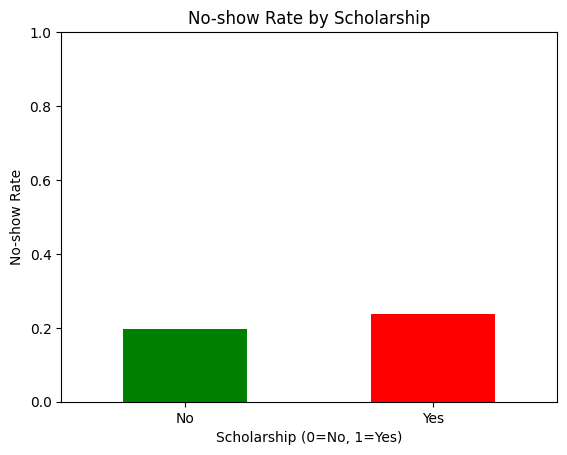

In [67]:
# Group by 'Scholarship' and calculate the average no-show rate
# 28% Received have scholarship they did not show!
scholarship_group = df.groupby('Scholarship')['No-show'].mean()
scholarship_group.plot(kind='bar', color=['green','red'])
plt.title('No-show Rate by Scholarship')
plt.xlabel('Scholarship (0=No, 1=Yes)')
plt.ylabel('No-show Rate')
plt.ylim(0,1)
plt.xticks([0,1], ['No', 'Yes'], rotation=0)
plt.show()


# checks the relationship between each medical condition 
(Hypertension, Diabetes, Alcoholism, and Handicap) and the no-show rate.

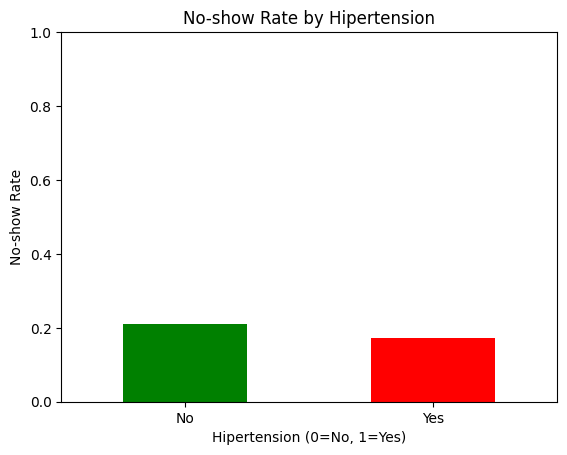

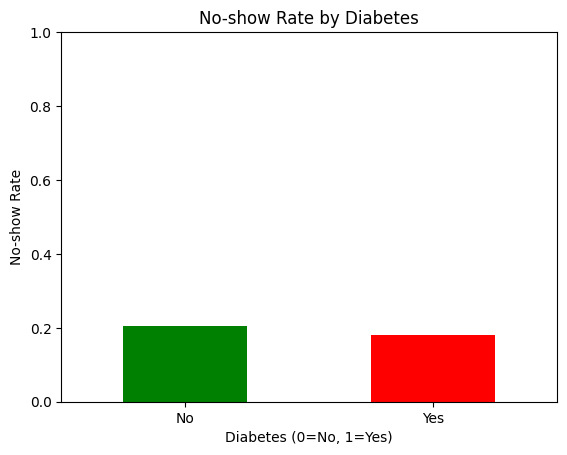

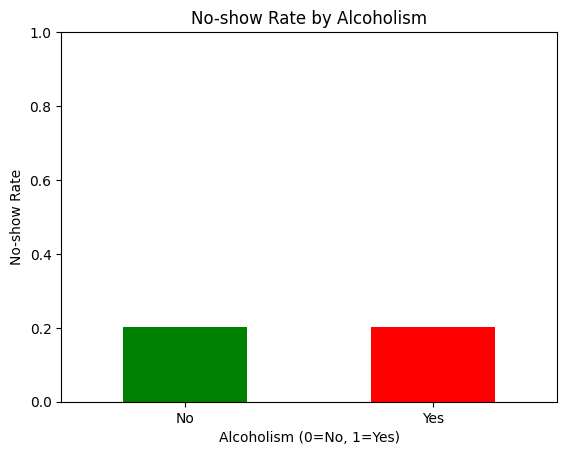

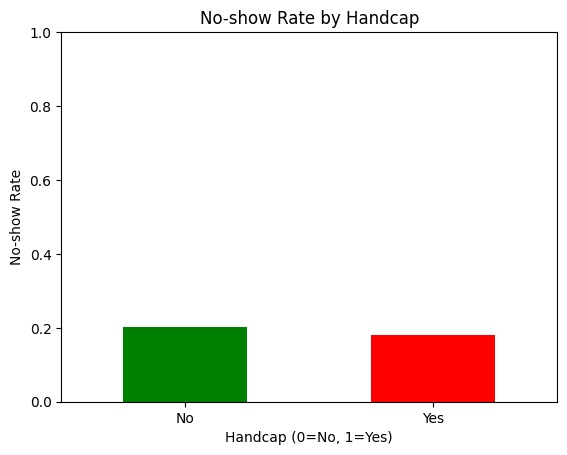

In [68]:
# Create a list of the conditions to loop through
#most of them show
condition = ['Hipertension', 'Diabetes', 'Alcoholism', 'Handcap']

for con in condition:
    group=df.groupby(con)['No-show'].mean()
    group.plot(kind='bar', title=f'No-show Rate by {con}', color=['green', 'red'])
    plt.xlabel(f'{con} (0=No, 1=Yes)')
    plt.ylabel('No-show Rate')
    plt.ylim(0,1)
    plt.xticks([0,1], ['No', 'Yes'], rotation=0)
    plt.show()
    
    

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed in relation to the question(s) provided at the beginning of the analysis. Summarize the results accurately, and point out where additional research can be done or where additional information could be useful.

> **Tip**: Make sure that you are clear with regards to the limitations of your exploration. You should have at least 1 limitation explained clearly. 

> **Tip**: If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should see output that starts with `NbConvertApp] Converting notebook`, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

# Conclusion
In this analysis, I explored factors that might be related to patients missing their appointments, such as SMS reminders, scholarships, and health conditions (Hypertension, Diabetes, Alcoholism, Handicap).

The findings showed slight differences in no-show rates across these variables. For example, about 28% of patients who received an SMS still missed their appointments. However, since no statistical tests were done, we cannot say these differences are meaningful or significant.

Limitation:
No statistical testing was performed, so I cannot confirm if the results are significant. Also, the dataset lacks other factors that could affect attendance.

Future Work:
To improve the analysis, future work should include statistical testing and more data (e.g. distance, income, or appointment time) to better understand the reasons behind no-shows.



In [69]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb

[NbConvertApp] Converting notebook Investigate_a_Dataset.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 9 image(s).
[NbConvertApp] Writing 562894 bytes to Investigate_a_Dataset.html
